### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('.\Pandas Test\Lego Project\Lego train.csv')


In [3]:
#View the basic stats for all the columns in the data set
data.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


In [4]:
#Count Null in Data set
pd.DataFrame(data.isnull().sum())

,0
ages,0
list_price,0
num_reviews,0
piece_count,0
play_star_rating,0
review_difficulty,0
star_rating,0
theme_name,0
val_star_rating,0
country,0


In [5]:
# drop id as it has no value
data = data.drop(['Id'], axis=1)

In [6]:
X = data.drop(['list_price'], axis = 1)
Y = data[['list_price']]

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X, Y , test_size=0.3, random_state=6)

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

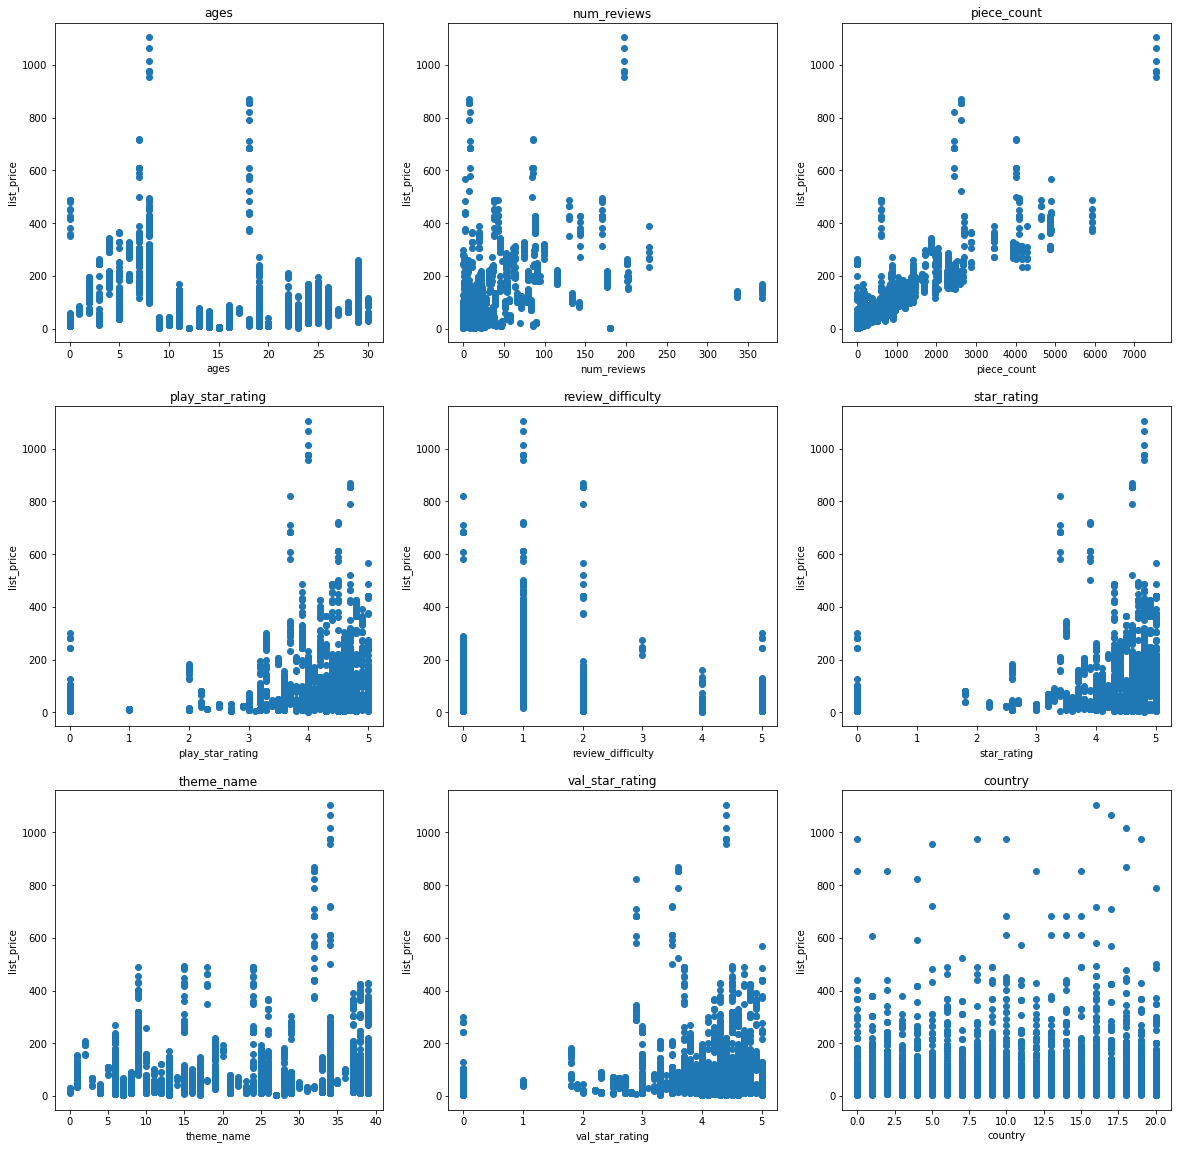

In [8]:
# Code starts here

cols = X_train.columns
fig, axes = plt.subplots(nrows = 3, ncols= 3, figsize = (20, 20))

for i in range(0,3):             
    for j in range(0,3):         
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(X_train[col], y_train)
            axes[i,j].set_xlabel(col) 
            axes[i,j].set_ylabel('list_price')
# Code ends here.


### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [9]:
# Code starts here
corr = X_train.corr()
print(corr.round(2)) 

                   ages  num_reviews  piece_count  play_star_rating  \
ages               1.00        -0.16        -0.09              0.23   
num_reviews       -0.16         1.00         0.55              0.15   
piece_count       -0.09         0.55         1.00              0.17   
play_star_rating   0.23         0.15         0.17              1.00   
review_difficulty -0.25        -0.20        -0.31             -0.67   
star_rating        0.10         0.16         0.18              0.90   
theme_name         0.48         0.02         0.17              0.15   
val_star_rating    0.12         0.17         0.19              0.92   
country           -0.02         0.01         0.01             -0.00   

                   review_difficulty  star_rating  theme_name  \
ages                           -0.25         0.10        0.48   
num_reviews                    -0.20         0.16        0.02   
piece_count                    -0.31         0.18        0.17   
play_star_rating             

In [10]:
#play_star_rating and  val_star_rating have a correlation of 0.91 its possible these are correlated.
#we drop it in the train and test data(X)
X_train = X_train.drop(['play_star_rating', 'val_star_rating'], axis=1)
X_test = X_test.drop(['play_star_rating', 'val_star_rating'], axis=1)
# Code ends here.

In [11]:

X_test.head(5)

,ages,num_reviews,piece_count,review_difficulty,star_rating,theme_name,country
6272,23,18,254,2,4.2,37,18
1262,19,0,109,5,0.0,8,11
8379,9,0,41,5,0.0,13,8
4989,8,337,1334,1,4.7,9,5
6452,0,1,135,4,4.0,4,19


### Model building

In [12]:
ModelReg = LinearRegression()

ModelReg.fit(X_train, y_train)
y_pred = ModelReg.predict(X_test)
#print(y_pred)

mse = round(mean_squared_error(y_test, y_pred),2)
print(f'MSE is {mse}')

r2 = round(r2_score(y_test, y_pred),2)
print(f' R^2 is {r2}') 


MSE is 2385.62
 R^2 is 0.73


### Residual check!

- Check the distribution of the residual.

In [13]:
# Code starts here
residual = y_test - y_pred
np.sum(residual)

list_price    2557.702739
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEEA9E6D30>]],
      dtype=object)

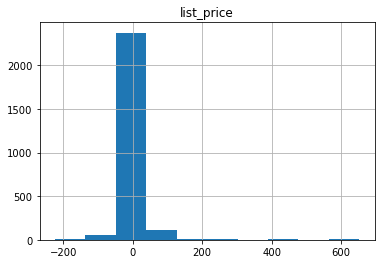

In [14]:
 
residual.hist()

# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [42]:
# Code starts here

data_pred = pd.read_csv('.\Pandas Test\Lego Project\Lego test.csv')

submission = pd.DataFrame(data_pred['Id'].copy())
data_pred = data_pred.drop(['Id'], axis=1)
data_pred = data_pred.drop(['play_star_rating', 'val_star_rating'], axis=1)


submission.head(4)


,Id
0,9907
1,5243
2,8276
3,6501


In [43]:
y_pred__td = np.round(ModelReg.predict(data_pred),2)
y_pred__td_pd =  pd.DataFrame(y_pred__td)
y_pred__td_pd.head(5)

,0
0,114.08
1,24.06
2,148.66
3,55.82
4,7.00


In [45]:
submission['list_price'] = y_pred__td

submission.to_csv('.\Pandas Test\Lego Project\submission.csv', index = False)
# Code ends here.